# Lesson 02: First Touch on Convolutions

In [1]:
from __future__ import print_function

from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras import backend as K

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

%matplotlib inline

In [2]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 5

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

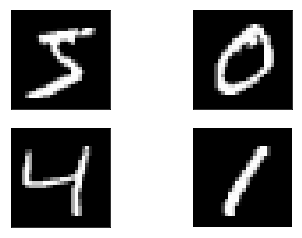

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
fig1 = plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
fig2 = plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
fig3 = plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
fig4 = plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.axis('off')
fig1.axes.get_xaxis().set_visible(False)
fig1.axes.get_yaxis().set_visible(False)
fig2.axes.get_xaxis().set_visible(False)
fig2.axes.get_yaxis().set_visible(False)
fig3.axes.get_xaxis().set_visible(False)
fig3.axes.get_yaxis().set_visible(False)
fig4.axes.get_xaxis().set_visible(False)
fig4.axes.get_yaxis().set_visible(False)
# show the plot
plt.show()

In [5]:
# Callback to Lesson 1

#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)


In [6]:
# input image dimensions
img_rows, img_cols = 28, 28

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Save test ground truth for the confusion matrix
y_true=y_test

# convert class vectors to binary class matrices
# "One-Hot-Encoding"
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 name="conv1"))
model.add(Conv2D(64, (3, 3), activation='relu', name="conv2"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 13s 223us/step - loss: 0.3350 - acc: 0.8995 - val_loss: 0.0750 - val_acc: 0.9762

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 11s 176us/step - loss: 0.1113 - acc: 0.9673 - val_loss: 0.0509 - val_acc: 0.9836

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 11s 177us/step - loss: 0.0843 - acc: 0.9747 - val_loss: 0.0417 - val_acc: 0.9866

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 11s 177us/step - loss: 0.0695 - acc: 0.9789 - val_loss: 0.0371 - val_acc: 0.9871

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 11s 177us/step - loss: 0.0621 - acc: 0.9819 - val_loss: 0.0346 - val_acc: 0.9881



In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03464861986723263
Test accuracy: 0.9881
